<a href="https://colab.research.google.com/github/SebastianVeilleux/machine_learning_iris_ds/blob/main/Proyecto_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Libraries used for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import scipy.stats


# A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.
# https://archive.ics.uci.edu/dataset/53/iris
# IRIS - UCI Machine Learning Repository
df = pd.read_excel('/content/drive/MyDrive/MA1042_Ciencia_de_Datos/iris.xlsx')

In [2]:
# A brief visualization of the data base
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Correlation
df.corr() #0.95 a 1.0 or -0.95 a -1.0

<ipython-input-3-4f17fc2fcafd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr() #0.95 a 1.0 or -0.95 a -1.0


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [4]:
# Splitting the df for test and training
train,test = train_test_split(df, test_size=0.20,random_state=42)

Let's try to predict the Petal Width based on the Petal Length

In [5]:
# Training model to predict PetalWidthCm based on the PetalLengthcm
modelo = smf.ols(formula='PetalWidthCm~PetalLengthCm',data=train)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:           PetalWidthCm   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     1483.
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           1.18e-68
Time:                        07:11:50   Log-Likelihood:                 20.647
No. Observations:                 120   AIC:                            -37.29
Df Residuals:                     118   BIC:                            -31.72
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.3609      0.044     -8.156

In [6]:
# Get the aproximation and diferences(errors or remainders)
y_aprox = -0.3609 + 0.4141 * test['PetalLengthCm']
differences1 = test['PetalWidthCm']-y_aprox

In [7]:
# Creating a table with real value, prediction and difference
table = pd.DataFrame({'Real':test['PetalWidthCm'],'Prediction':y_aprox,'Difference':differences1})
table.head()

,Real,Prediction,Difference
73,1.2,1.58537,-0.38537
18,0.3,0.34307,-0.04307
118,2.3,2.49639,-0.19639
78,1.5,1.50255,-0.00255
76,1.4,1.62678,-0.22678


#For this example we got an R-squared: 0.926

### Looks like a great model, but I think we can do better. Let's try some thing different.

### Maybe we can try adding more variables

In [8]:
# Now we are going to take more variables such as SepalLengthCm,	SepalWidthCm and PetalLengthCm

# Training model to predict PetalWidthCm based on the PetalLengthcm, SepalLengthCm and SepalWidthCm
modelo = smf.ols(formula='PetalWidthCm ~ SepalLengthCm + SepalWidthCm + PetalLengthCm',data=train)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:           PetalWidthCm   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     613.0
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           5.97e-71
Time:                        07:11:50   Log-Likelihood:                 33.675
No. Observations:                 120   AIC:                            -59.35
Df Residuals:                     116   BIC:                            -48.20
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.1791      0.188     -0.954

In [9]:
# Get the aproximation and diferences(errors or remainders)
y_aprox2 = -0.1791 + -0.2379 * test['SepalLengthCm'] + 0.2430 * test['SepalWidthCm'] +  0.5367 * test['PetalLengthCm']
differences2 = test['PetalWidthCm']-y_aprox2

In [10]:
# Creating a table with real value, prediction and difference
table2 = pd.DataFrame({'Real':test['PetalWidthCm'],'Prediction':y_aprox2,'Difference':differences2})
table2.head()

,Real,Prediction,Difference
73,1.2,1.57260,-0.37260
18,0.3,0.30066,-0.00066
118,2.3,2.32410,-0.02410
78,1.5,1.51335,-0.01335
76,1.4,1.45974,-0.05974


# Here is a table where we can compare the mathematical difference between the real value and the prediction for where I used 1 variable in 'Remainder Table 1' and 3 variables for 'Remainder Table 2'

In [11]:
# creating a table with to see the difference in the remainders of table1 and table2
table1_table2_differences = pd.DataFrame({'Difference Model 1':differences1,'Difference Model 2':differences2})
table1_table2_differences

,Difference Model 1,Difference Model 2
73,-0.38537,-0.37260
18,-0.04307,-0.00066
118,-0.19639,-0.02410
78,-0.00255,-0.01335
76,-0.22678,-0.05974
31,0.13975,0.23251
64,0.17014,0.17452
141,0.54899,0.63014
68,-0.00255,0.20433
82,-0.05409,0.00969


# For this example we got an R-squared: 0.941

### Math doesn't Lie, we're getting closer

### But I am forgetting one variable. It may be not a numerical Variable

### But what if I add the species? Will I get closer?

In [12]:
# Categorical variable of specie to dummie
dummies = pd.get_dummies(df['Species'])

In [13]:
# Adding dummies to the df and renaming colums
# so we can work with them with the libraries
df3 = pd.concat([df,dummies],axis=1)
df3.rename(columns={'Iris-setosa':'Iris_setosa'},inplace=True)
df3.rename(columns={'Iris-versicolor':'Iris_versicolor'},inplace=True)
df3.rename(columns={'Iris-virginica':'Iris_virginica'},inplace=True)

In [14]:
df3.corr()

<ipython-input-14-cf5c64484bf6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df3.corr()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris_setosa,Iris_versicolor,Iris_virginica
Id,1.000000e+00,0.716676,-0.397729,0.882747,0.899759,-0.816515,-3.481012e-18,0.816515
SepalLengthCm,7.166763e-01,1.000000,-0.109369,0.871754,0.817954,-0.717416,7.939552e-02,0.638020
SepalWidthCm,-3.977288e-01,-0.109369,1.000000,-0.420516,-0.356544,0.595601,-4.646996e-01,-0.130901
PetalLengthCm,8.827473e-01,0.871754,-0.420516,1.000000,0.962757,-0.922688,2.015868e-01,0.721102
PetalWidthCm,8.997586e-01,0.817954,-0.356544,0.962757,1.000000,-0.887510,1.183760e-01,0.769134
Iris_setosa,-8.165147e-01,-0.717416,0.595601,-0.922688,-0.887510,1.000000,-5.000000e-01,-0.500000
Iris_versicolor,-3.481012e-18,0.079396,-0.464700,0.201587,0.118376,-0.500000,1.000000e+00,-0.500000
Iris_virginica,8.165147e-01,0.638020,-0.130901,0.721102,0.769134,-0.500000,-5.000000e-01,1.000000


In [15]:
# Splitting the new df with the dummies included
train,test = train_test_split(df3,test_size=0.20,random_state=42)

In [16]:
# Training the model including dummies.
# There isn't a need to include Iris Virginica.
modelo = smf.ols(formula=' PetalWidthCm ~ SepalLengthCm + SepalWidthCm +  PetalLengthCm + Iris_setosa + Iris_versicolor',data=train)
modelo = modelo.fit() # entrenar o calcular los betasp
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:           PetalWidthCm   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.3
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           4.49e-74
Time:                        07:11:50   Log-Likelihood:                 48.024
No. Observations:                 120   AIC:                            -84.05
Df Residuals:                     114   BIC:                            -67.32
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.5121      0.209     

In [17]:
# Get the aproximation and diferences(errors or remainders)
y_aprox3 = 0.5121 + -0.1346*test['SepalLengthCm'] + 0.2867*test['SepalWidthCm'] + 0.2748*test['PetalLengthCm'] + -0.9831*test['Iris_setosa'] + -0.3530*test['Iris_versicolor']
differences3 = test['PetalWidthCm']-y_aprox3

In [18]:
# Creating a table with real value, prediction and difference
table3 = pd.DataFrame({'Real':test['PetalWidthCm'],'Prediction':y_aprox3,'Difference':differences3})
table3.head()

,Real,Prediction,Difference
73,1.2,1.43236,-0.23236
18,0.3,0.31840,-0.01840
118,2.3,2.11722,0.18278
78,1.5,1.41953,0.08047
76,1.4,1.36562,0.03438


In [19]:
# creating a table with to see the difference in the remainders of prediction 1(1var), 2(3var) and 3(6var)
table1_table2_differences = pd.DataFrame({'Difference Model 1':differences1,'Difference Model 2':differences2,'Difference Model 3:':differences3})
table1_table2_differences

,Difference Model 1,Difference Model 2,Difference Model 3:
73,-0.38537,-0.37260,-0.23236
18,-0.04307,-0.00066,-0.01840
118,-0.19639,-0.02410,0.18278
78,-0.00255,-0.01335,0.08047
76,-0.22678,-0.05974,0.03438
31,0.13975,0.23251,0.21086
64,0.17014,0.17452,0.07395
141,0.54899,0.63014,0.42639
68,-0.00255,0.20433,0.30808
82,-0.05409,0.00969,-0.02423


# For this example we got an R-squared: 0.953

### Yes! I got closer and closer as I where adding more variables to the training

### Now lets add some graphs and the Kolmogorov Test

Text(0, 0.5, 'Prediction')

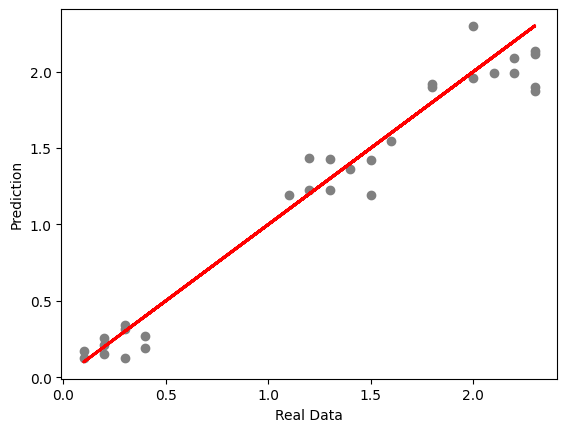

In [20]:
# Real data vs prediction

plt.scatter(table3['Real'],table3['Prediction'],color='gray')
plt.plot(table3['Real'],table3['Real'],color='red',linewidth=2)
plt.xlabel('Real Data')
plt.ylabel('Prediction')

Text(0, 0.5, 'residuo')

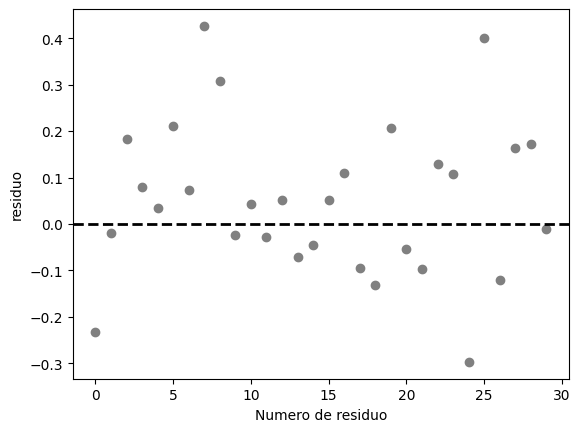

In [21]:
# Number of remainder vs remainder | number of difference vs difference
n_difference = len(differences3)
plt.scatter(range(n_difference),differences3,color='gray')
plt.axhline(y=0,linestyle='--',color='black',lw=2)
plt.xlabel('Numero de residuo')
plt.ylabel('residuo')

Text(0, 0.5, 'Frecuency or probability')

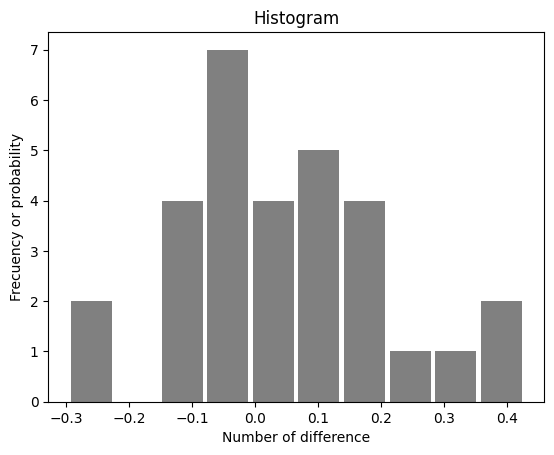

In [22]:
# Histrogram
plt.hist(x=differences3,color='gray',rwidth=0.9)
plt.title('Histogram')
plt.xlabel('Number of difference')
plt.ylabel('Frecuency or probability')

In [23]:
table3.describe()

,Real,Prediction,Difference
count,30.000000,30.000000,30.000000
mean,1.263333,1.212300,0.051033
std,0.810910,0.777352,0.166219
min,0.100000,0.127740,-0.296940
25%,0.325000,0.282445,-0.051175
50%,1.350000,1.392575,0.047245
75%,2.000000,1.915487,0.155700
max,2.300000,2.296940,0.426390


In [24]:
mean = 0.051033
std = 0.166219
dist_ref=scipy.stats.norm(loc=mean,scale=std)

In [25]:
test_ks=scipy.stats.kstest(differences3,dist_ref.cdf)
test_ks

KstestResult(statistic=0.07966164458889347, pvalue=0.9831900770813723, statistic_location=-0.011370000000000158, statistic_sign=1)